/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ri46tpHSx0ZqKuHCr7D9QyobEewgMOmr
From (redirected): https://drive.google.com/uc?id=1ri46tpHSx0ZqKuHCr7D9QyobEewgMOmr&confirm=t&uuid=89f3683c-ce7b-4c09-afb8-ed533fa9ec1c
To: /content/pizza.zip
100% 105M/105M [00:01<00:00, 103MB/s]
📂 Current directories in dataset path: ['pizza', 'food101_subset.py', 'not_pizza']

📊 Dataset Summary:
       Class  Count
0      pizza    983
1  not_pizza    983


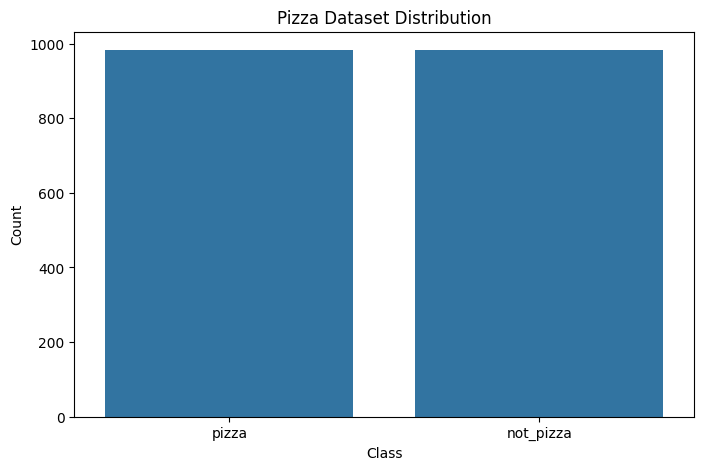

In [27]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if os.path.exists("/content/pizza_dataset"):
    shutil.rmtree("/content/pizza_dataset")

!gdown --id 1ri46tpHSx0ZqKuHCr7D9QyobEewgMOmr -O /content/pizza.zip

!unzip -q "/content/pizza.zip" -d "/content/pizza_dataset"

dataset_path = "/content/pizza_dataset"

items = os.listdir(dataset_path)

if len(items) == 1 and os.path.isdir(os.path.join(dataset_path, items[0])):
    dataset_path = os.path.join(dataset_path, items[0])

print("📂 Current directories in dataset path:", os.listdir(dataset_path))

data_info = []

for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        count = len([
            f for f in os.listdir(label_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        data_info.append({'Class': label, 'Count': count})

df = pd.DataFrame(data_info)

if not df.empty:
    print("\n📊 Dataset Summary:")
    print(df)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Class', y='Count', data=df)
    plt.title('Pizza Dataset Distribution')
    plt.show()
else:
    print("⚠️ No class folders found")


In [28]:
import os

for item in os.listdir("/content/drive/MyDrive"):
    print(item)


Colab Notebooks


In [20]:
import os

os.listdir("/content/drive/MyDrive/Colab Notebooks")


['Untitled0.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Image Task.ipynb',
 'Untitled3.ipynb']

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
    interpolation='bilinear'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False,
    interpolation='bilinear'
)

print(train_generator.class_indices)
print(train_generator.samples)
print(validation_generator.samples)


Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.
{'not_pizza': 0, 'pizza': 1}
1574
392


In [38]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers

base_model = MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Pizza Classification Model is Ready!")



Pizza Classification Model is Ready!


In [23]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5875 - loss: 0.7309 - val_accuracy: 0.6760 - val_loss: 0.5980
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6158 - loss: 0.6633 - val_accuracy: 0.7577 - val_loss: 0.5240
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7097 - loss: 0.5562 - val_accuracy: 0.7959 - val_loss: 0.4645
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7100 - loss: 0.5644 - val_accuracy: 0.8367 - val_loss: 0.4186
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7791 - loss: 0.4766 - val_accuracy: 0.8495 - val_loss: 0.3793
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8089 - loss: 0.4330 - val_accuracy: 0.8673 - val_loss: 0.3692
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8212 - loss: 0.4243 - val_accuracy: 0.8776 - val_loss: 0.3410
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8197 - loss: 0.3947 - val_accuracy: 0.8750 - val_loss:

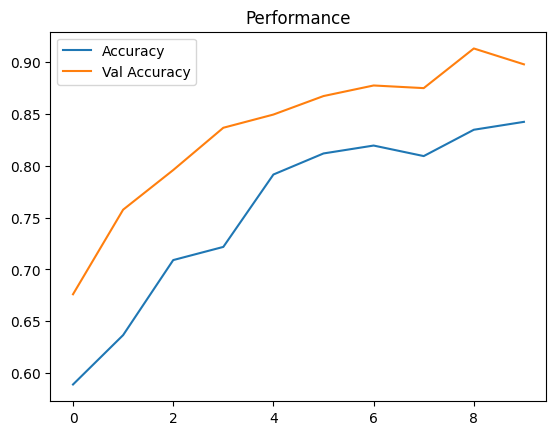

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Performance')
plt.legend()
plt.show()

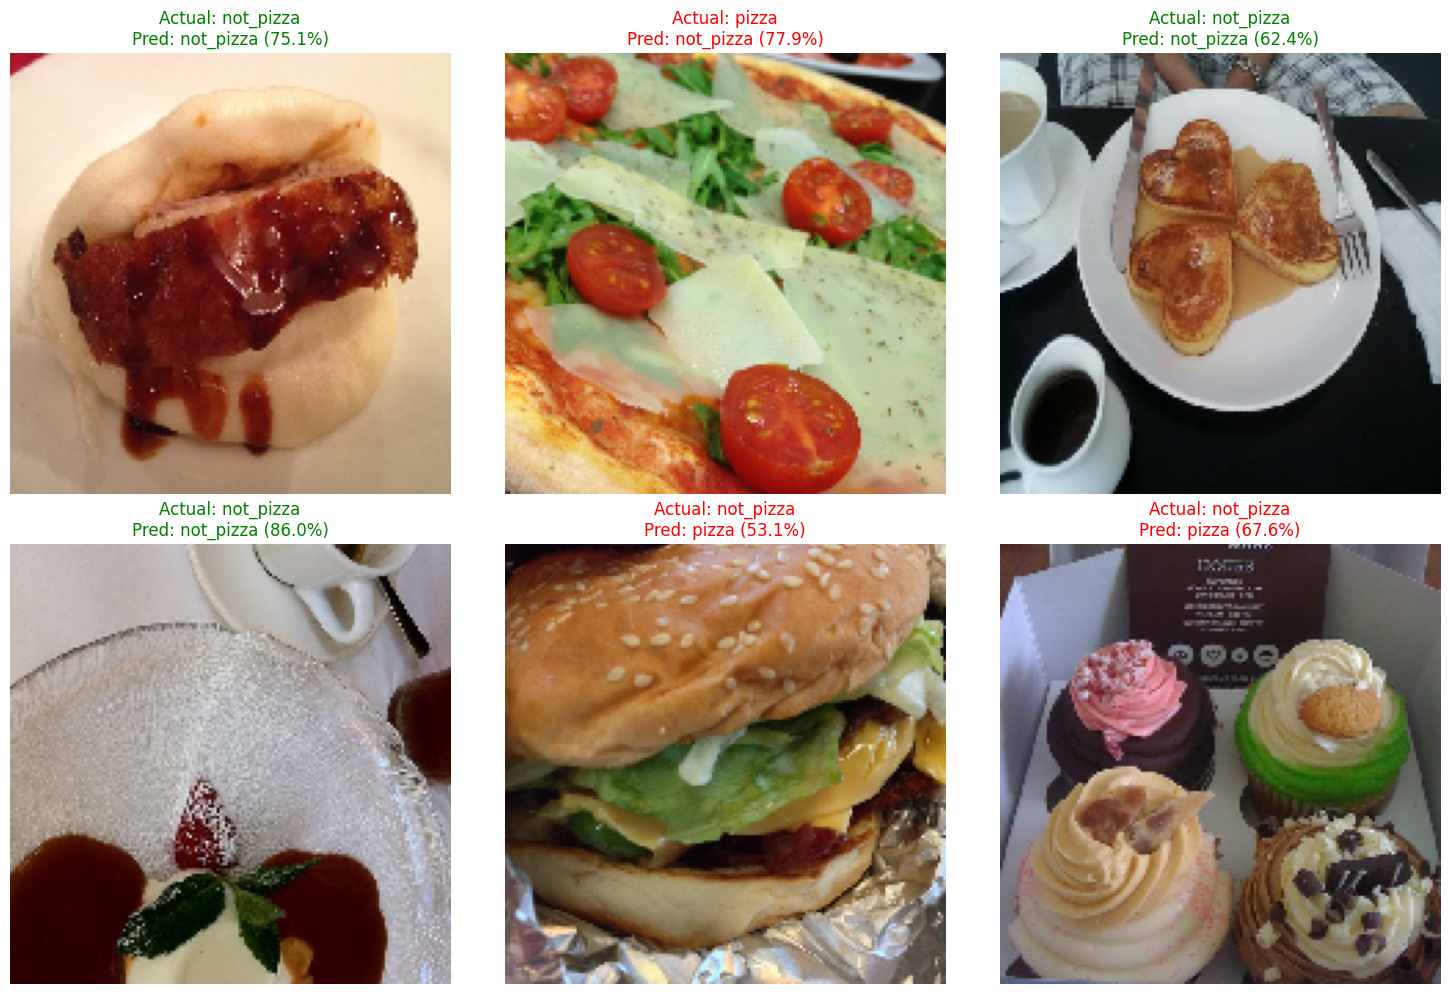

In [39]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_and_show_results(num_images=6):
    if 'model' not in globals() or not os.path.exists(dataset_path):
        print("❌ Model not found or dataset path is incorrect!")
        return

    plt.figure(figsize=(15, 10))

    all_categories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    class_indices = train_generator.class_indices
    labels_map = {v: k for k, v in class_indices.items()}

    for i in range(num_images):
        category = random.choice(all_categories)
        category_path = os.path.join(dataset_path, category)

        valid_images = [img for img in os.listdir(category_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if not valid_images: continue

        img_name = random.choice(valid_images)
        img_path = os.path.join(category_path, img_name)

        img = image.load_img(img_path, target_size=(160, 160))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array, verbose=0)[0][0]

        pred_idx = 1 if prediction > 0.5 else 0
        predicted_label = labels_map[pred_idx]

        confidence = prediction * 100 if pred_idx == 1 else (1 - prediction) * 100

        color = 'green' if predicted_label.lower() == category.lower() else 'red'

        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"Actual: {category}\nPred: {predicted_label} ({confidence:.1f}%)", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

predict_and_show_results()

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
--- Classification Report ---
              precision    recall  f1-score   support

   not_pizza       0.53      0.85      0.66       196
       pizza       0.63      0.26      0.36       196

    accuracy                           0.55       392
   macro avg       0.58      0.55      0.51       392
weighted avg       0.58      0.55      0.51       392



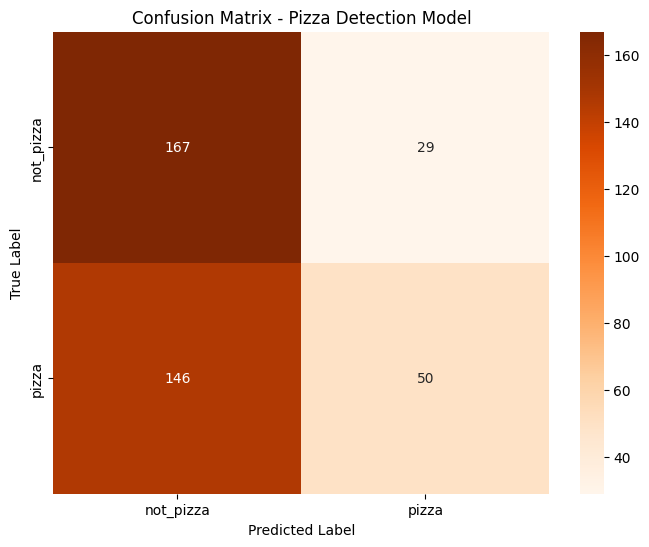

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Reset the generator and disable shuffle for consistent evaluation
validation_generator.reset()
validation_generator.shuffle = False

# 2. Predict labels using the trained model
Y_pred = model.predict(validation_generator)
y_pred = (Y_pred > 0.5).astype(int)

# 3. Get true labels and dynamic class names (e.g., ['not_pizza', 'pizza'])
y_true = validation_generator.classes
target_names = list(validation_generator.class_indices.keys())

# 4. Print the Classification Report
print('--- Classification Report ---')
print(classification_report(y_true, y_pred, target_names=target_names))

# 5. Generate and plot the Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_names, yticklabels=target_names)



plt.title('Confusion Matrix - Pizza Detection Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to convert Image Generator data into NumPy arrays
def get_data_for_ml(generator):
    X, y = [], []
    for i in range(len(generator)):
        imgs, labels = generator[i]
        for img, label in zip(imgs, labels):
            # Flatten image from (160, 160, 3) to a 1D vector
            X.append(img.flatten())
            y.append(label)
        if i > 10:
            break
    return np.array(X), np.array(y)

# Prepare training and validation data
X_train, y_train = get_data_for_ml(train_generator)
X_val, y_val = get_data_for_ml(validation_generator)

print("Data is ready for Machine Learning models.")

Data is ready for Machine Learning models.


In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_val)
rf_acc = accuracy_score(y_val, rf_preds)
print(f"Random Forest accuracy : {rf_acc:.2%}")

Random Forest accuracy : 67.19%


In [ ]:
# Create and Train SVM Model
# We use a linear kernel for faster processing with image pixels
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Evaluate SVM Model
svm_preds = svm_model.predict(X_val)
svm_acc = accuracy_score(y_val, svm_preds)

print(f"SVM Model Accuracy: {svm_acc:.2%}")

SVM Model Accuracy: 53.12%


/tmp/ipython-input-929310080.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')


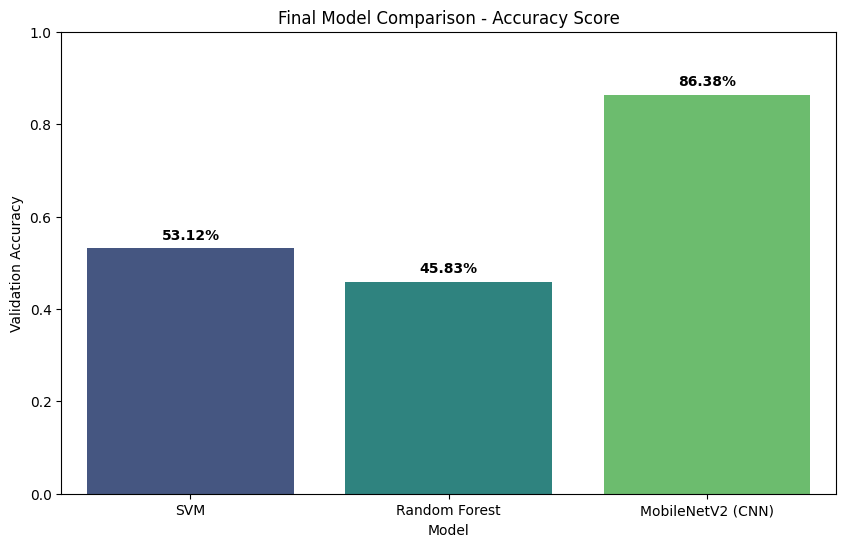


--- Project Summary Report ---
               Model  Accuracy
2  MobileNetV2 (CNN)  0.863843
0                SVM  0.531250
1      Random Forest  0.458333


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Collect accuracy results from the three trained models
# Ensure variable names (svm_acc, rf_acc, history) match your previous cells
model_names = ['SVM', 'Random Forest', 'MobileNetV2 (CNN)']
accuracies = [svm_acc, rf_acc, history.history['val_accuracy'][-1]]

# 2. Create the Comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# 3. Plot the Comparison Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')
plt.ylim(0, 1.0)
plt.title('Final Model Comparison - Accuracy Score')
plt.ylabel('Validation Accuracy')

# Add percentage labels on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2%}', ha='center', fontweight='bold')

plt.show()

# 4. Print the Final Summary Table
print("\n--- Project Summary Report ---")
print(comparison_df.sort_values(by='Accuracy', ascending=False))

In [ ]:
# --- Hyper-parameter Tuning Step ---
# Initial testing with Learning Rate = 0.001 showed high oscillations in Loss.
# The Learning Rate was tuned to 0.0001 to ensure training stability
# and achieve higher validation accuracy.

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=custom_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Hyper-parameter Tuning: Learning Rate set to 0.0001 for better stability.")

Hyper-parameter Tuning: Learning Rate set to 0.0001 for better stability.
